In [82]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Linear Regression
In this Colab you will use a real dataset to train a model to predict the housing price.

## Learning Objectives
After completing this Colab, you'll be able to:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explore a [dataset](https://developers.google.com/machine-learning/glossary/#data_set) with Python visualization libraries.
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) to build a linear regression model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Compare training runs using [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) and [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

# Part 1 - Setup Exercise


---



## Load required modules

This exercise depends on several Python libraries to help with data manipulation, machine learning tasks, and data visualization.

**Instructions**
1. Run the **Load dependencies** code cell (below).

In [110]:
#@title Code - Load dependencies

#general
import io
from google.colab import drive

# data
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# machine learning
import keras
from keras import layers

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# **The dataset**
Datasets are often stored on disk or at a URL in .csv format.

A well-formed .csv file contains column names in the first row, followed by many rows of data. A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000

### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

# **Your Task:**

T1. Import the .csv file into a pandas DataFrame and scale the values in the label (`median_house_value`):

In [111]:
# Import the dataset.
# drive.mount('/content/drive')
# house_df = pd.read_csv('/content/drive/MyDrive/california_housing_train.csv')

house_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
# Scale the label.
# house_df['median_house_value'] = house_df['median_house_value']/1000
scaler = StandardScaler()
house_df['median_house_value_scaled'] = scaler.fit_transform(house_df[['median_house_value']])

# Print the first rows of the pandas DataFrame.
house_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_scaled
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1.210558
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1.096745
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1.048461
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1.154514
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1.222629


# Part 2 - Dataset Exploration


---



# **Your Task : View dataset statistics**

A large part of most machine learning projects is getting to know your data. In this step, you will use the appropriate method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**
1. Inspect the output and answer these questions:
  * What is the maximum no. of bedrooms?
  * What is the mean income?
  * What is teh maximum "median house value"?
  * Are any features missing data?

In [85]:
#@title Code - View dataset statistics
house_df.describe(include='all')
# print(house_df.head(3))
#max no.of bedrooms
max_bedrooms = house_df['total_bedrooms'].max()
# mean income
mean_income = house_df['median_income'].mean()
# max "median house value"
max_median_house = house_df['median_house_value'].max()
# missing data in features
missing_data = house_df.isnull().sum().sum()
# print(missing_data)

print("What is the maximum bedrooms? 				Answer: ${bedrooms:.2f}".format(bedrooms = max_bedrooms))
print("What is the mean income? 				Answer: ${income:.2f}".format(income = mean_income))
print("What is the maximum 'median house value'?		Answer: ${max_median_house:.2f}".format(max_median_house = max_median_house))
print("Are any features missing data? 				Answer:", "No" if missing_data == 0 else "Yes")


What is the maximum bedrooms? 				Answer: $6445.00
What is the mean income? 				Answer: $3.88
What is the maximum 'median house value'?		Answer: $500001.00
Are any features missing data? 				Answer: No


## Your Task:  Generate a correlation matrix

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label).

 use a **correlation matrix** to identify features whose values correlate well with the label. Correlation values have the following meanings:

  * **`1.0`**: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * **`-1.0`**: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * **`0.0`**: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.

**Instructions**

Answer these questions:
  * Which feature correlates most strongly to the label house price?
  * Which feature correlates least strongly to the label house price?


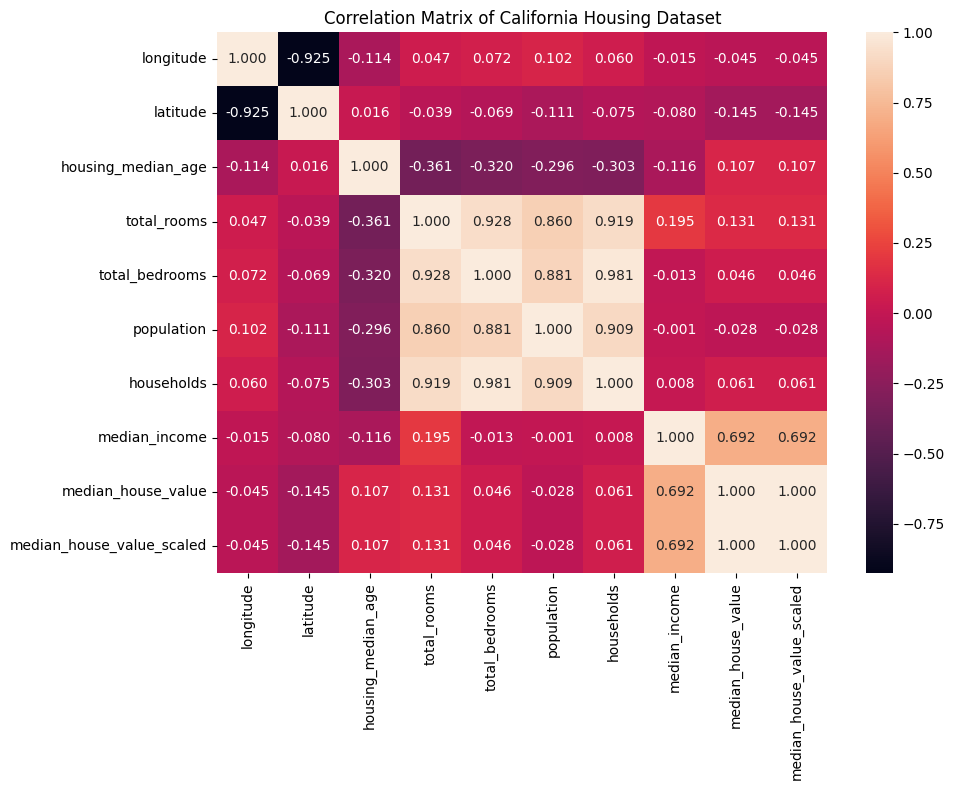

Feature that correlates most strongly with house price: median_income (0.692)
Feature that correlates least strongly with house price: population (0.028)


In [86]:
#@title Code - View correlation matrix
corr_matrix = house_df.corr()
#plot the correlation matrix using sns heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f")
plt.title('Correlation Matrix of California Housing Dataset')
plt.tight_layout()
plt.show()

# Find strongest and least correlations with the label
corr_with_label = corr_matrix['median_house_value'].drop('median_house_value').abs().sort_values(ascending=False)
print(f"Feature that correlates most strongly with house price: {corr_with_label.index[1]} ({corr_with_label.iloc[1]:.3f})")
print(f"Feature that correlates least strongly with house price: {corr_with_label.index[-1]} ({corr_with_label.iloc[-1]:.3f})")


## Your Task: Visualize relationships in dataset

Use a **pair plot** to generate a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

Explain your understanding from the pair plot


In [87]:
#@title Code - View pairplot

px.scatter_matrix(house_df, dimensions=house_df.columns
                  ,width = 1500, height =1500)

**Pair Plot Analysis**
The pair plot shows relationships between all features.
1. Median income shows strong positive correlation with target median_house_value that means the median house value increases with median income.
2. Longitude and latitude show widely spread patterns and shows a weak correlation (in negative correlation.)
3. Most features show some degree of correlation with the median_house_value.


# Part 3 - Train Model


---



# **## Your Task: Define functions to build and train a model**



In [88]:
#@title Code - Define ML functions
def build_model(my_learning_rate):
    model = keras.Sequential([
        layers.Dense(units=1, input_shape=(1,), activation=None)
    ])


    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[keras.metrics.RootMeanSquaredError()])

    return model

def train_model(model, dataset, feature, label, my_epochs, my_batch_size=None):
   # Prepare the feature data
    feature_data = dataset[feature].values.reshape(-1, 1)
    label_data = dataset[label].values
    # Fit the model with feature and label,...
    history = model.fit(x=feature_data,
                       y=label_data,
                       batch_size=my_batch_size,
                       epochs=my_epochs,
                       shuffle=True,
                       verbose=1)

    # Get the historical values of the loss function
    epochs = history.epoch
    loss = history.history["loss"]  # Mean Squared Error
    rmse = history.history["root_mean_squared_error"]

    return  epochs,loss, rmse

def plot_the_loss_curve(epochs, rmse, loss=None):
    plt.figure(figsize=(12, 4))

    # Plot RMSE
    plt.subplot(1, 2, 1)
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(epochs, rmse, label="RMSE", color='blue')
    plt.legend()
    plt.ylim([rmse[0]*0.97, max(rmse)*1.03])
    plt.title("RMSE vs Epoch")

    # Plot loss
    if loss is not None:
        plt.subplot(1, 2, 2)
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error (Loss)")
        plt.plot(epochs, loss, label="Loss (MSE)", color='red')
        plt.legend()
        plt.ylim([loss[0]*0.97, max(loss)*1.03])
        plt.title("Loss (MSE) vs Epoch")

    plt.tight_layout()
    plt.show()

# **Your Task: Train a model with one feature**

In this step you will train a model to predict the housing price using a **single feature** (e.g., total_rooms)

Use the following hyperparameters:

learning_rate = 0.001,
epochs = 20,
batch_size = 50

**Instructions**

1. Build your model with one feature.
1. Review the output from the training run
1. **Check your understanding** by answering these questions:
  * How many epochs did it take to converge on the final model?
  * How well does the model fit the sample data?

During training, you should see the root mean square error (RMSE) in the output. The units for RMSE are the same as the units for the label (dollars). In other words, you can use the RMSE to determine how far off, on average, the predicted house prices are in dollars from the observed values.

In [89]:
#@title Code - Experiment 0

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

features = "median_income"
label = "median_house_value_scaled"

# # Scale the label just before training to ensure the column exists
# scaler = StandardScaler()
# house_df['median_house_value_scaled'] = scaler.fit_transform(house_df[['median_house_value']])


# Build the model
model = build_model(learning_rate)
# Train the model
epochs_list, loss_list, rmse_list = train_model(model, house_df,features, label, epochs, batch_size)

print(f"\nFinal Loss (MSE): {loss_list[-1]:.4f}")
print(f"Final RMSE: {rmse_list[-1]:.4f}")
# Convert RMSE back to original scale
rmse_original_scale = rmse_list[-1] * scaler.scale_[0]
print(f"Final RMSE (in original dollars): ${rmse_original_scale:.2f}")

#Plot the loss
# plot_the_loss_curve(epochs_list, rmse_list, loss_list)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.5429 - root_mean_squared_error: 5.0487
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6556 - root_mean_squared_error: 3.5539
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9651 - root_mean_squared_error: 2.4403
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0621 - root_mean_squared_error: 1.7485
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9940 - root_mean_squared_error: 1.4114
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5751 - root_mean_squared_error: 1.2550
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5095 - root_mean_squared_error: 1.2285
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3895 - root_mean_squared_error: 1.1787
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3031 - root_mean_squared_error: 1.1414
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2049 - root_mean_squared_error: 1.097

1. The RMSE starts at 5.04 and steadily decreases. After about 15 epochs, the changes are very small after each epoch and the model took about 15 epochs to converge.
2. The model fits moderately well with median_income feature. It captures the main trend but still limited by few features with about $86,000 prediction error.

# **## Your Task: Experiment with hyperparameters**

It is common with machine learning to run multiple experiments to find the best set of hyperparmeters to train your model. In this step, try varying the hyperparameters one by one with this set of experiments:

* *Experiment 1:* **Increase** the learning rate to **``1``** (batch size at ``50``).
* *Experiment 2:* **Decrease** the learning rate to **``0.0001``** (batch size at ``50``).
* *Experiment 3:* **Increase** the batch size to **``500``** (learning rate at ``0.001``).

**Instructions**
1. Update the hyperparameter values
2. Execute your code.
3. After the training run, examine the output and note any differences you see in the loss curve or model output.
4. Repeat steps 1 - 3 for each hyperparameter experiment.
5. **Check your understanding** by answering these questions:
  * How did raising the learning rate impact your ability to train the model?
  * How did lowering the learning rate impact your ability to train the model?
  * Did changing the batch size effect your training results?


In [90]:
#@title Code - Experiment 1
learning_rate = 1.0
epochs = 20
batch_size = 50
features = "median_income"
label = "median_house_value_scaled"

model1 = build_model(learning_rate)
epochs_list1, loss_list1, rmse_list1 = train_model(model1, house_df, features, label, epochs, batch_size)

print(f"learning rate = 1.0, batch size =50")
print(f"Final Loss (MSE): {loss_list1[-1]:.4f}")
print(f"Final RMSE: {rmse_list1[-1]:.4f}")
# Convert RMSE back to original scale
rmse_original_scale = rmse_list[-1] * scaler.scale_[0]
print(f"Final RMSE (in original dollars): ${rmse_original_scale:.2f}")



Epoch 1/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8069 - root_mean_squared_error: 1.2616
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6179 - root_mean_squared_error: 0.7856
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6013 - root_mean_squared_error: 0.7752
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6421 - root_mean_squared_error: 0.8010
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6383 - root_mean_squared_error: 0.7988
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7199 - root_mean_squared_error: 0.8480
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6848 - root_mean_squared_error: 0.8273
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7515 - root_mean_squared_error: 0.8654
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6664 - root_mean_squared_error: 0.8160
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6275 - root_mean_squared_err

In [91]:
#@title Code - Experiment 2
learning_rate = 0.0001
epochs = 20
batch_size = 50


features = "median_income"
label = "median_house_value_scaled"

model2 = build_model(learning_rate)
epochs_list2, loss_list2, rmse_list2 = train_model(model2, house_df, features, label, epochs, batch_size)

print(f"learning rate = 0.0001, batch size =50")
print(f"Final Loss (MSE): {loss_list2[-1]:.4f}")
print(f"Final RMSE: {rmse_list2[-1]:.4f}")
# Convert RMSE back to original scale
rmse_original_scale = rmse_list2[-1] * scaler.scale_[0]
print(f"Final RMSE (in original dollars): ${rmse_original_scale:.2f}")

Epoch 1/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.3752 - root_mean_squared_error: 4.8345
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.2348 - root_mean_squared_error: 4.6078
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.3191 - root_mean_squared_error: 4.5075
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.1061 - root_mean_squared_error: 4.2550
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.7759 - root_mean_squared_error: 4.2155
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.8665 - root_mean_squared_error: 3.9828
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.0297 - root_mean_squared_error: 3.8765
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.6958 - root_mean_squared_error: 3.7005
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.7575 - root_mean_squared_error: 3.5713
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.9456 - root_mean_s

In [92]:
#@title Code - Experiment 3

learning_rate = 0.001
epochs = 20
batch_size = 500

features = "median_income"
label = "median_house_value_scaled"

model3 = build_model(learning_rate)
epochs_list3, loss_list3, rmse_list3 = train_model(model3, house_df, features, label, epochs, batch_size)

print(f"learning rate = 0.001, batch size =500")
print(f"Final Loss (MSE): {loss_list3[-1]:.4f}")
print(f"Final RMSE: {rmse_list3[-1]:.4f}")
# Convert RMSE back to original scale
rmse_original_scale = rmse_list3[-1] * scaler.scale_[0]
print(f"Final RMSE (in original dollars): ${rmse_original_scale:.2f}")

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.0453 - root_mean_squared_error: 4.6951
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.4413 - root_mean_squared_error: 4.5209
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.8559 - root_mean_squared_error: 4.3423
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3515 - root_mean_squared_error: 4.1655
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.2097 - root_mean_squared_error: 4.0258
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.6680 - root_mean_squared_error: 3.8299
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.6910 - root_mean_squared_error: 3.7001
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5666 - root_mean_squared_error: 3.5449
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.4592 - root_mean_squared_error: 3.3851
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.6014 - root_mean_squared_error: 3.2558



*  How did raising the learning rate impact your ability to train the model?

A high learning rate (1.0) led to fast and make the model convergence efficient. But it can cause overshooting as learning rate is high. Increasing the learning rate improved convergence speed and better accuracy here.
*  How did lowering the learning rate impact your
ability to train the model?

A very small learning rate (0.0001) caused the model training too slow and resulted high RMSE. The smallest learning rate is observed that prediction is inaccurate and failed to converge.
*   Did changing the batch size effect your training results?

By changing the batch size sees the result better than the experiment 2. The training was faster and fewer updates per epoch. Although it reduced training effectiveness slighly, but not getting a good result as smaller batch size.



# **## Your Task Train a model with the "Population" feature**

Report your findings


In [105]:
#@title Code - Experiment population
learning_rate = 0.001
epochs = 20
batch_size = 50

features = "population"
label = "median_house_value_scaled"

model4 = build_model(learning_rate)
epochs_list4, loss_list4, rmse_list4 = train_model(model4, house_df, features, label, epochs, batch_size)

print(f"with population feature")
print(f"Final Loss (MSE): {loss_list4[-1]:.4f}")
print(f"Final RMSE: {rmse_list4[-1]:.4f}")
# Convert RMSE back to original scale
rmse_original_scale = rmse_list4[-1] * scaler.scale_[0]
print(f"Final RMSE (in original dollars): ${rmse_original_scale:.2f}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1715321.7500 - root_mean_squared_error: 1308.1482
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 736557.2500 - root_mean_squared_error: 856.5479
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 264960.0000 - root_mean_squared_error: 513.2532
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74638.7422 - root_mean_squared_error: 271.6411
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13932.9180 - root_mean_squared_error: 117.3933
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1807.8939 - root_mean_squared_error: 42.1662
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 149.6001 - root_mean_squared_error: 12.1135
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8026 - root_mean_squared_error: 2.9322
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5175 - root_mean_squared_error: 1.2316
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

The population feature has low correlation value with the median house value. So, population alone is not a reliable predictor of house prices. The model get an RMSE of about 134,000. This indicates it has less accurate than models trained with stronger features such as median_income.

# Part 4 - Validate Model


---



# **Your Task: Use the model to make predictions**

Now that you have a trained model, you can use the model to make predictions. In practice, you should make predictions on examples that are not used during training. However, for this exercise, you'll just work with a subset of the same training dataset. In another Colab exercise you will explore ways to make predictions on examples not used in training.

1. **Check your understanding** by answering these questions:
  * How close is the predicted value to the label value? In other words, does your model accurately predict the housing price?

In [94]:
#@title Code - Define functions to make predictions
def format_currency(x):
  return "${:.2f}".format(x)

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.reset_index(drop=True, inplace=True)
  return batch

def predict_houseprice(model, df, feature, label, batch_size=10):
    batch = build_batch(df, batch_size)

    # Prepare feature data for prediction
    feature_data = batch[feature].values.reshape(-1, 1)
    predicted_values = model.predict(feature_data)

    # Convert predictions back to original scale
    predicted_original = scaler.inverse_transform(predicted_values.reshape(-1, 1)).flatten()
    observed_original = batch[label.replace('_scaled', '')].values

    data = {
        "FEATURE_VALUE": batch[feature].values,
        "PREDICTED_HOUSE_PRICE": [format_currency(p) for p in predicted_original],
        "OBSERVED_HOUSE_PRICE": [format_currency(o) for o in observed_original],
        "L1_LOSS": [format_currency(abs(o - p)) for o, p in zip(observed_original, predicted_original)]
    }
    rmse = np.sqrt(np.mean((predicted_original - observed_original) ** 2))
    print(f"Root Mean Squared Error (RMSE): {format_currency(rmse)}")
    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [107]:
#@title Code - Make predictions
output = predict_houseprice(model, house_df, "median_income", "median_house_value_scaled")
show_predictions(output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Root Mean Squared Error (RMSE): $77362.38
--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   FEATURE_VALUE PREDICTED_HOUSE_PRICE OBSERVED_HOUSE_PRICE     L1_LOSS
0         4.1786            $225572.30           $201500.00   $24072.30
1         2.4671            $168338.55           $276300.00  $107961.45
2         2.6087            $173073.77            $96200.00   $76873.77
3         5.8733            $282244.28           $287000.00    $4755.72
4         2.2027            $159496.83           $192700.00   $33203.17
5         3.6090            $206524.48           $135700.00   $70824.48
6         3.3906            $199221.03           $138100.00   $61121.03
7         4.0938            $222736.55           $126900.00   $95836.55
8         3.2870            $

In [109]:
#@title Double-click to view answers for validate model

# How close is the predicted value to the label value?
# -----------------------------------------------------------------------------
answer = '''The RMSE of predicting house price is about $77,000. On average, the predicted prices are reasonably
close to the observed values within about $80,000. But while some houses are predicted with a few
difference thousand dollars, some can be differed by more than $100,000. To be able to improve
the prediction and reduce the error, it is important to choose the useful features.'''

print(answer)

The RMSE of predicting house price is about $77,000. On average, the predicted prices are reasonably 
close to the observed values within about $80,000. But while some houses are predicted with a few 
difference thousand dollars, some can be differed by more than $100,000. To be able to improve
the prediction and reduce the error, it is important to choose the useful features.


# **Your Task (Optional): Bonus Grades**

1. Try to train your model on the basis of multiple features (you can check from the coorelation matrix which features give you a strong indication of relationship with the label).
2. After training your model with multiple features, test your model and report your findings.
3. You may also tweak the hyperparameters to see what works best

Report your findings.


In [102]:
def build_multi_feature_model(my_learning_rate, num_features):
    model = keras.Sequential([
        layers.Dense(units=1, input_shape=(num_features,), activation=None)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[keras.metrics.RootMeanSquaredError()])

    return model

def train_multi_feature_model(model, dataset, features, label, my_epochs, my_batch_size=None):
    # Prepare feature data
    feature_data = dataset[features].values
    label_data = dataset[label].values

    history = model.fit(x=feature_data,
                       y=label_data,
                       batch_size=my_batch_size,
                       epochs=my_epochs,
                       shuffle=True,
                       verbose=1)

    epochs = history.epoch
    loss = history.history["loss"]
    rmse = history.history["root_mean_squared_error"]

    return epochs, loss, rmse

In [103]:
# Select most correlated features
top_features = ['median_income', 'housing_median_age','total_rooms']
print(f"Training with features: {top_features}")

multi_model = build_multi_feature_model(0.001, len(top_features))
epochs_multi, loss_multi, rmse_multi = train_multi_feature_model(
    multi_model, house_df, top_features, "median_house_value_scaled", 20, 50
)

print(f"Multi-feature model Final RMSE: {rmse_multi[-1]:.4f}")
rmse_original_multi = rmse_multi[-1] * scaler.scale_[0]
print(f"Multi-feature model RMSE (in original dollars): ${rmse_original_multi:.2f}")


Training with features: ['median_income', 'housing_median_age', 'total_rooms']
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 160364.4219 - root_mean_squared_error: 389.2602
Epoch 2/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 207.8866 - root_mean_squared_error: 14.2103
Epoch 3/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 94.6762 - root_mean_squared_error: 9.7294
Epoch 4/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.2311 - root_mean_squared_error: 9.0126
Epoch 5/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65.7288 - root_mean_squared_error: 8.1067
Epoch 6/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52.1251 - root_mean_squared_error: 7.2178
Epoch 7/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37.5161 - root_mean_squared_error: 6.1225
Epoch 8/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.6585 - root_mean_squared_error: 5.0636
Epoch 9/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.8088 - root_mean_squared_error: 4.0952
Epoch 10/20
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6430 - root_mean_squar

# Findings with multiple features


'''The RMSE of predicting house price with most related features is about $95,000. This is a moderate prediction although not much difference with single feature since the other features have weaker correlations with median_house_value than median_income.   '''
